# STA 208: Homework 2 (Do not distribute)

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

In [1]:
import numpy as np

In [2]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

1.1

\begin{align}
\ell_i(\beta) &\propto - \log p(y_i | x_i, \beta) \\
         &\propto -\log \frac{\lambda^y_i}{y_i !} e^{-\lambda}\\
         &\propto - y_i\log \lambda + \lambda + \log(y_i !)\\
         &\propto - y_i\log e^{\beta^\top x_i} + e^{\beta^\top x_i} + \log(y_i!)\\
         &\propto -y_i {\beta^\top x_i}+ e^{\beta^\top x_i} + \log(y_i!)
\end{align}

So,

\begin{align}
\frac{\partial \ell_i}{\partial \beta} &= -y_i x_i + e^{\beta^\top x_i} x_i \\
                          &= ( e^{\beta^\top x_i} - y_i )x_i
\end{align}

1.2

\begin{align}
R_n(\beta) &= \frac{1}{n}\sum_{i=1}^n \ell_i(\beta) \\
       &\propto \frac{1}{n}\sum_{i=1}^n -y_i {\beta^\top x_i}+ e^{\beta^\top x_i} + \log(y_i!) \\ 
        &\propto \frac{1}{n}\sum_{i=1}^n -y_i {\beta^\top x_i}+ e^{\beta^\top x_i}
\end{align}

for any $0 \le \alpha \le 1$,

\begin{align}
R_n(\alpha \beta_1 + (1-\alpha) \beta_2) &\propto \frac{1}{n}\sum_{i=1}^n -y_i {(\alpha \beta_1 + (1-\alpha) \beta_2)^\top x_i}+ e^{(\alpha \beta_1 + (1-\alpha) \beta_2)^\top  x_i} \\
                           &\propto \frac{1}{n}\sum_{i=1}^n -y_i {\alpha \beta_1}^\top x_i - y_i {(1-\alpha) \beta_2}^\top x_i + e^{\alpha \beta_1^\top x_i} e^{(1-\alpha) \beta_2^\top  x_i} \\
                           &\leq \frac{1}{n}\sum_{i=1}^n -y_i {\alpha \beta_1}^\top x_i + \alpha e^{\beta_1^\top x_i} - y_i {(1-\alpha) \beta_2}^\top x_i + (1-\alpha) e^{\beta_2^\top  x_i}\ \ (since\ e^x\ is\ convex)\\
                           &= \alpha R_n(\beta_1) + (1-\alpha) R_n(\beta_2)
\end{align}

So $R_n(\beta)$ is  a convex function of $\beta$ .

( or $\frac{\partial^2 \ell_i}{\partial \beta^2} = e^{\beta^\top x_i} x_i^\top x_i \geq 0$ )        

1.3

Since $\hat \beta$ is the minimizer of $R_n$, we have $\nabla R_n(\hat \beta) = 0$. 

Then $F(\hat \beta) = \hat \beta - \eta \nabla R_n(\hat \beta) = \hat \beta - 0 = \hat\beta$

1.4

In [3]:
import matplotlib.pyplot as plt

In [4]:
def gradient_descent(X, y, eta, max_iter, n, p):
    
    #est_beta = np.random.normal(0, .2, size = (p))
    est_beta = np.zeros(p)
    error = []
    for i in range(max_iter):
        temp = est_beta - eta * (np.exp(X @ (est_beta.T) - y)).T @ X / n
        error.append(sum((temp - est_beta)**2))
        if sum((temp - est_beta)**2) < 1e-16:
            break
        est_beta = temp
        
    plt.plot(np.arange(len(error)), error)
    plt.ylabel(r'$||\beta_{new} - \beta_{pre}||_2^2$')
    return est_beta        

Sum of square error between two vectors: 0.086863


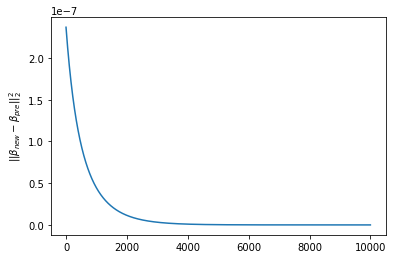

In [5]:
est_beta = gradient_descent(X, y, 2e-3, 10000, n, p)

print("Sum of square error between two vectors: %f" % sum((est_beta - beta)**2))

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 
1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

2.1

Denote $X_S$ as the submatrix of $X$ that only contains the $s_1$, ..., $s_{|S|}$ th column, where $s_i \in S$, $\beta_S$ as the vector that only contains the $s_1$, ..., $s_{|S|}$ th element of $\beta$.

Then $\|y-X\beta\|_2^2$ where $\|\beta\|_0 \leq 0$ equals to $\|y-X_S\beta_S\|_2^2$

Since $\hat \beta_S = argmin \|y-X_S\beta_S\|_2^2 = H_S y$ , where $H_S = X_S(X_S^\top X_S)^{-1} X_S^\top$

The subset selection problem could be written as 
$$\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,$$

where $P_S = I - X_S(X_S^\top X_S)^{-1} X_S^\top$, which is the projection matrix that projects a vector onto the linear subspace of $R^n$ that is orthogonal to the column space of $X_S$. 

2.2

\begin{align}
y^\top P_{S_k} y - y^\top P_{S_{k+1}} y &= y^\top (I - H_{S_k}) y - y^\top (I - H_{S_{k+1}}) y \\
&=  y^\top (H_{S_{k+1}} - H_{S_k})y \\
\end{align}

Since $S_1\subset S_2 \subset \ldots \subset S_p$, and $H_S$ is positive semidefinite 

$rank(H_{S_{k+1}} - H_{S_k}) = 1$, $(H_{S_{k+1}} - H_{S_k})$ project a vetor in $R^n$ to a subspace generated by column $S_{k+1}\backslash S_k$ of $X$

$(H_{S_{k+1}} - H_{S_k})$ is positive semidefinite 

$y^\top P_{S_k} y - y^\top P_{S_{k+1}} y \ge 0$

So the subset selection problem will always choose k variables. The constraint here will be equal to $|S| = k$.

2.3

Since $X$ is orthogonal, $X_S = (x_{S_1}, x_{S_2},...,x_{S_{|S|}})$ is also orthognal

then $H_S = X_S X_S^\top$

\begin{align}
\min_S y^\top P_S y &= \max_S y^\top H_S y \\
               &= \max_S \|X_S^\top y\|_2^2 \\
               &= \max_{S, |S|\leq k}\sum_{i=1}^{|S|} (x_i^\top y)^2
\end{align}

where $x_i$ is the ith column of X

It can be seen that to get the maximum value, we need to choose the top k largest absolute values of $X^\top y$

```
beta_full = X.T @ y
find out the top k largest elements of abs(beta_full), save the indices in `ind`
beta_s = np.zeros[p]
beta_s[ind] = beta_full[ind] 
```

2.4

$X = I = (e_1, e_2, ..., e_p)$, where $e_i = (0,...,1,...0)^\top$ (vector that every element is 0 except the ith inde)

then $X_S = (e_{S_1}, e_{S_2},..., e_{S_|S|})$, $e_i\top y = y_i$

From 2.3, $S$ chose by subset selection will be the index of the top k largest values of $|y_i|$ , i.e. $|\beta_i + \epsilon_i|$

Since $|\beta_i| \ge \mu$ when $i \in S_0$

To split $S_0$ from $S\backslash S_0$, i.e. split $|\beta_i + \epsilon_i|$ from $|\epsilon_j|$, 

we need $\max_{i=1}^n |\epsilon_i| < \frac{\mu}{2}$

($\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)}$, $\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}$)


\begin{align}
\mathbb P(\max_{i=1}^n |\epsilon_i| < \frac{\mu}{2}) &= \mathbb P(|\epsilon_{(1)}| < \frac{\mu}{2}, ..., |\epsilon_{(n)}| < \frac{\mu}{2}) \\
&\ge 1-\sum_{i=1}^nP(|\epsilon_i| \ge \frac{\mu}{2}) \\
                             &= 1-nP(|\epsilon_i| \ge \frac{\mu}{2})\\
                             &\ge 1-2ne^{-\frac{\mu^2}{8\sigma^2}}\\
                             &\ge 1-2ne^{-\log(\frac{2n}{\delta})}\\
                             &= 1-\delta
\end{align}


__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression using a validation set and compute the test error (square error loss).
3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [6]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [7]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge,lars_path
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

3.1 OLS

In [9]:
# Normalize 
X_tr, norms = normalize(X_tr, axis=0, return_norm=True)
X_te /= norms 

In [10]:
ols = LinearRegression(fit_intercept=False)
ols.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [11]:
print("MSE of OLS is %f" % np.mean((y_te - ols.predict(X_te))**2))

MSE of OLS is 1.039644


3.2 Ridge Regression

In [12]:
# split into training dataset and validation dataset
X_train, X_val,y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.33, random_state = 123) 

In [13]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_val = std.transform(X_val)
X_train_2 = std.transform(X_tr)
X_test = std.transform(X_te)

Text(0.5, 1.0, 'MSE for the Validation Dataset')

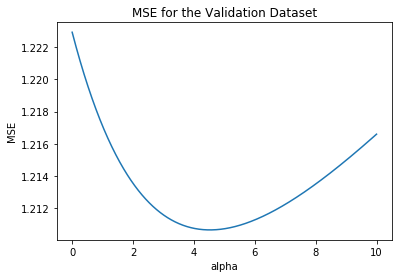

In [14]:
# tuning parameter
mse = []
alphas = np.linspace(0,10,1000)
for a in alphas:
    rdg = Ridge(alpha=a, fit_intercept=False)
    rdg.fit(X_train, y_train)
    mse.append(mean_squared_error(y_val, rdg.predict(X_val)))

plt.plot(alphas, mse)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE for the Validation Dataset")

In [15]:
# chose the parameter that having the smallest MSE
alpha_best = alphas[np.argmin(mse)]
ridge_best = Ridge(alpha=alpha_best, fit_intercept=False)
ridge_best.fit(X_train_2, y_tr)

Ridge(alpha=4.524524524524525, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
print("MSE of Ridge Regression is %f" % mean_squared_error(y_te, ridge_best.predict(X_test)))

MSE of Ridge Regression is 1.075950


3.3 Lasso Path

In [17]:
_, _, coefs_modf = lars_path(X_tr, y_tr, method = 'lasso')

In [18]:
mse_lasso = []
for i in range(coefs_modf.shape[1]):
    y_pred = X_te @ coefs_modf[:,i]
    mse_lasso.append(mean_squared_error(y_te, y_pred))

Text(0.5, 1.0, 'Test Error of Lasso Path')

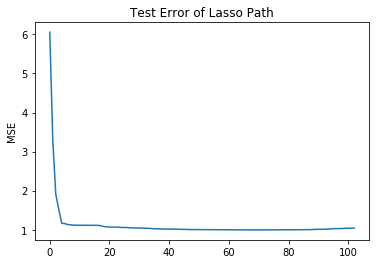

In [19]:
plt.plot(np.array(range(coefs_modf.shape[1])), mse_lasso)
plt.ylabel("MSE")
plt.title("Test Error of Lasso Path")

3.4 LAR with/without Lasso modifiction

In [20]:
_, _, coefs_lar = lars_path(X_tr, y_tr, method = 'lar')

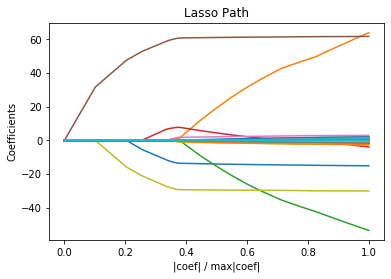

<function matplotlib.pyplot.show(*args, **kw)>

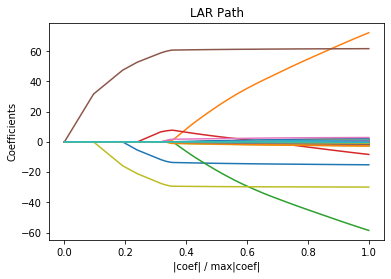

In [21]:
plot_lars(coefs_modf, title= "Lasso Path")
plt.show()
plot_lars(coefs_lar, title = "LAR Path")
plt.show

Noticed that when the red line hit 0, in the Lasso path the coefficient remains as 0  for some time, and coefficients were recomputed; while in the LAR Path, there is no change in the slope of lines. 

This means the coefficient in Lasso Path left the active set for a while. However, in the LAR Path, it is not allowed to leave the active set.

3.5 Restricted OLS

In [22]:
mse_restrict = []
num = []
ols_restrict = LinearRegression(fit_intercept=False)
for i in range(coefs_modf.shape[1]):
    temp = coefs_modf[:,i]!=0
    if(sum(temp)==0):
        continue
    num.append(sum(temp))    
    ols_restrict.fit(X_tr[:,temp], y_tr)
    mse_temp = mean_squared_error(y_te, ols_restrict.predict(X_te[:,temp]))
    mse_restrict.append(mse_temp)

Text(0, 0.5, 'MSE')

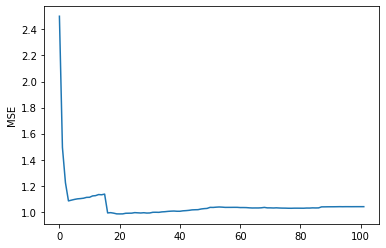

In [23]:
plt.plot(np.array(range(len(mse_restrict))), mse_restrict)
plt.ylabel("MSE")

3.6

Since a more parsimonious model is wanted, considering the Lasso models or the restricted OLS models.

From the plot below, the number of non-zero variables increase from 1 to 100.

Text(0.5, 1.0, 'Number of non-zero variables')

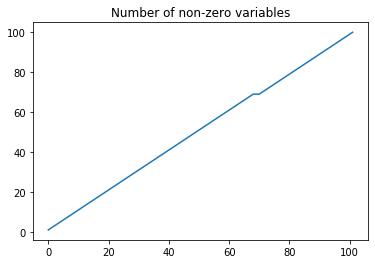

In [24]:
plt.plot(np.array(range(len(num))), num)
plt.title("Number of non-zero variables")

Text(0, 0.5, 'MSE of Testing dataset')

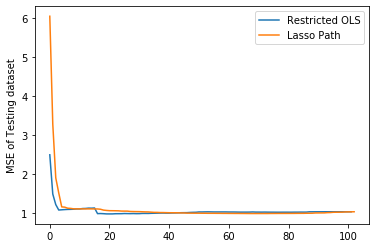

In [25]:
plt.plot(np.array(range(len(mse_restrict))), mse_restrict, 
         label = "Restricted OLS")
plt.plot(np.array(range(coefs_modf.shape[1])), mse_lasso,
         label = "Lasso Path")
plt.legend()
plt.ylabel("MSE of Testing dataset")

In [26]:
## test error of lasso path
np.min(mse_lasso), num[np.argmin(mse_lasso)]

(0.9938410330702541, 69)

In [27]:
## test error of ristricted OLS
np.min(mse_restrict), num[np.argmin(mse_restrict)]

(0.9840561908608665, 21)

From the test error plot above, the restriced OLS model which choose 21 variables should be used. 

Because this model includes a small numbers of variables, and has the smallest test error. 